# Fruits360 - Multiclass classification of Fruits360 images (with Pytorch Toolkit)

<img src="https://miro.medium.com/max/1200/1*jcZLpgh3gppeFFgcpFSP0w.jpeg" width="800">

* This workbook illustrates my attempt to solve the [Kaggle Fruits360 challenge](https://www.kaggle.com/moltean/fruits) with the `Pytorch Toolkit` - a library I wrote to make training, evaluation & testing of models easier (Download from [my Github Repository](https://github.com/mjbhobe/dl-pytorch) - also refer to the [step-by-step tutorial](https://github.com/mjbhobe/dl-pytorch/blob/master/Tutorial.md) to get started).
* In this workbook I'll be using Pytorch with a pretrained VGG16 model, trained on ImageNet dataset.
* This workbook also shows you how you can connect to Kaggle from a Colab Notebook and download dataset(s) for use locally - we will be downloading the Fruits360 datset from Kaggle to our Colab environment.

<font color='firebrick'>It is recommended that you run this notebook on a GPU only, like ones available on Google Colab or Kaggle</font>

Following cell sets up access to our Google Drive

In [2]:
# set this flag to True when you run this Notebook on Google Collaboratory
USE_COLAB = True

import os

#@see: https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q
if USE_COLAB:
    # Load the Drive helper and mount
    from google.colab import drive

    # We mount our Goofgle Drive to this foloder - following line will prompt for authorization.
    gdrive_mount_point = '/content/drive/'
    drive.mount(gdrive_mount_point)
    grive_path = os.path.join(gdrive_mount_point, "My Drive/")
    print('Your Google Drive is mounted at ', grive_path)
    COLAB_NOTEBOOKS_PATH = os.path.join(grive_path, "Colab Notebooks/")
    PYTORCH_COLAB_NOTEBOOKS_PATH = os.path.join(COLAB_NOTEBOOKS_PATH, 'pytorch')
    
    if os.path.exists(PYTORCH_COLAB_NOTEBOOKS_PATH):
        print('You Pytorch Colab notebooks are available at ', PYTORCH_COLAB_NOTEBOOKS_PATH)
    
        # display list of files
        #!ls '/content/drive/My Drive/Colab Notebooks/'

        # append our Google Drive folder to module search 
        # **NOTE:** comment this line out if you are NOT running this notebook on Google Colab
        import sys
        #sys.path.append("/content/drive/My Drive/Colab Notebooks/")
        sys.path.append(PYTORCH_COLAB_NOTEBOOKS_PATH)
        print('NOTE: {} is appended to sys.path!'.format(PYTORCH_COLAB_NOTEBOOKS_PATH))
        # and test it
        import pytorch_toolkit as pytk
        MODEL_SAVE_DIR = os.path.join(PYTORCH_COLAB_NOTEBOOKS_PATH, 'model_states')
        IMAGES_ZIP_DIR = "/content/drive/My Drive/Colab Notebooks/data/kaggle/fruits360"
    else:
        raise IOError("Unable to mount Google Drive!")
else:
    MODEL_SAVE_DIR = os.path.join('.','model_states')
    IMAGES_ZIP_DIR = "./images/pytorch/fruits360"
    
if not os.path.exists(MODEL_SAVE_DIR):
    os.mkdir(MODEL_SAVE_DIR)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Your Google Drive is mounted at  /content/drive/My Drive/
You Pytorch Colab notebooks are available at  /content/drive/My Drive/Colab Notebooks/pytorch
NOTE: /content/drive/My Drive/Colab Notebooks/pytorch is appended to sys.path!


## Downloading the dataset from Kaggle
You can download datasets directly from Kaggle into a Colab environment by running the following steps:
* Login to your Kaggle account and _create a new API Token_ from your profile page (click the `Create API Token` button and download the `kaggle.json` file locally i.e. to your disk.
* Upload the `kaggle.json` that you downloaded to Colab  and move the file to `~/.kaggle/kaggle.json`
* Install Python packages `kaggle` and `kaggle-cli` that needed to access Kaggle programatically. These can be installed using `pip`
* Now you can access datasets on Kaggle
    * Run `!kaggle datasets list` shell command to list all available datasets (may no be such a useful command!)
    * Run `!datasets list -s <<dataset_name>>` to search for a dataset (e.g. for the Malaria dataset, I used `kaggle list -s malaria`)
    * Copy dataset locally using `!kaggle datasets download -d <<full_path_of_dataset>> -p <<target_folder_path>>`

Run the following cells to download the [Fruits360 dataset](https://www.kaggle.com/moltean/fruits) from Kaggle to your Colab environment.

In [0]:
# assuming you downloaded kaggle.json file to your desktop, run this cell to upload that file to Colab
# this sometimes causes problems, especially if I am behind a firewalls and uploads are jammed!
# This command will display a "upload file" prompt - select the kaggle.json file from your disk & upload

# Uncomment following 2 lines to upload local kaggle.json file to Colab - the file will be uploaded to
# the folder on your Google drive from where you will this this workbook.
# from google.colab import files
# files.upload()

In [4]:
# so I uploaded my kaggle.json to my Google drive, which I can easily copy into Colab workspace :)
!ls -al "/content/drive/My Drive/Colab Notebooks/kaggle.json"

-rw------- 1 root root 63 Aug 19  2019 '/content/drive/My Drive/Colab Notebooks/kaggle.json'


In [5]:
# Run this cell to copy the uploaded kaggle.json file to ~/.kaggle/kaggle.json 
# Kaggle expects the token file to be located here!!
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Colab Notebooks/kaggle.json" ~/.kaggle/
# give "me" full access to kaggle.json (i.e. read/write & execute)
!chmod 600 ~/.kaggle/kaggle.json
# confirm that ~/.kaggle folder has kaggle.json file
!ls ~/.kaggle

kaggle.json


In [6]:
# install Python packages require to access Kaggle datasets
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 3.2MB/s 
     |████████████████████████████████| 5.3MB 6.1MB/s 
     |████████████████████████████████| 112kB 42.6MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 112kB 37.5MB/s 


In [0]:
# Vola! You now have access to Kaggle datasets

# to list **all** the datasets available on Kaggle, run the following shell command
#!kaggle datasets list

In [8]:
# We can look for a specific dataset (e.g. the fruits dataset) like this
# Search Command is: kaggle datasets list -s complete_or_part_name_of_dataset

!kaggle datasets list -s fruits  # I don't know the exact name, so I used a part-name - fruits

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
moltean/fruits                                              Fruits 360                                         732MB  2020-04-25 09:56:45          40759  
mjamilmoughal/fruits-with-colors-dataset                    Fruits with colors dataset                          816B  2018-01-13 10:22:33           3650  
sriramr/fruits-fresh-and-rotten-for-classification          Fruits fresh and rotten for classification           4GB  2018-08-24 15:05:40           2089  
chrisfilo/fruit-recognition                                 Fruit Recognition                                    8GB  2020-02-04 18:52:00           1527  
mbkinaci/fruit-images-for-object-detection                  Fruit Imag

The first one is the one we are looking for. Let's download the zip file to our `/tmp` folder - **this completes the download of data from Kaggle**

In [9]:
# download command: kaggle datasets download -d <<file_name>> -p <<dest>>

!kaggle datasets download -d moltean/fruits -p /tmp
!ls /tmp

 99% 721M/732M [00:08<00:00, 96.1MB/s]
100% 732M/732M [00:08<00:00, 94.5MB/s]
drivefs_ipc.0  drivefs_ipc.0_shell  fruits.zip	tmp6810o8l7


Now that we have _downloaded_ data from Kaggle to our local Colab environment, let's unzip the contents.

In [10]:
# and let us unzip cell-images-for-detecting-malaria.zip to /tmp folder
import os, shutil
import zipfile

zip_file_path = '/tmp/fruits.zip'
assert os.path.exists(zip_file_path)

# extract all files to /tmp
print('Source zip: %s' % zip_file_path)
print('Extracting all images...', end='', flush=True)
zip_ref = zipfile.ZipFile(zip_file_path, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()
print('done!', flush=True)

Source zip: /tmp/fruits.zip
Extracting all images...done!


In [0]:
# now unhide the left panel in Colab, click the Files 'tab' & browse to /tmp folder
# you should see the following folders under /tmp
# /tmp
#   + fruits-360
#       + Training   (training dataset images - several sub-folders under this folder)
#       + Test       (test dataset images - several sub-folders under this folder)
#       + ....       (and many more that I am not interested in)

train_folder_root = '/tmp/fruits-360/Training'
test_folder_root = '/tmp/fruits-360/Test'

assert os.path.exists(train_folder_root), f"FATAL: {train_folder_path} -> path does not exist!"
assert os.path.exists(test_folder_root), f"FATAL: {test_folder_path} -> path does not exist!"

In [24]:
# a quick dict of category-id to category-name (category name is parent folder under which image is present)
fruit_category_names = sorted(os.listdir(train_folder_root))
fruit_categories = {}
for i, name in enumerate(fruit_category_names):
    fruit_categories[i] = name

NUM_CLASSES = len(fruit_categories.keys())
print('Detected %d classes' % NUM_CLASSES)

Detected 120 classes


## About the Kaggle Dataset

**Content**
The following fruits and are included: 
Apples (different varieties: Crimson Snow, Golden, Golden-Red, Granny Smith, Pink Lady, Red, Red Delicious), Apricot, Avocado, Avocado ripe, Banana (Yellow, Red, Lady Finger), Beetroot Red, Blueberry, Cactus fruit, Cantaloupe (2 varieties), Carambula, Cauliflower, Cherry (different varieties, Rainier), Cherry Wax (Yellow, Red, Black), Chestnut, Clementine, Cocos, Dates, Eggplant, Ginger Root, Granadilla, Grape (Blue, Pink, White (different varieties)), Grapefruit (Pink, White), Guava, Hazelnut, Huckleberry, Kiwi, Kaki, Kohlrabi, Kumsquats, Lemon (normal, Meyer), Lime, Lychee, Mandarine, Mango (Green, Red), Mangostan, Maracuja, Melon Piel de Sapo, Mulberry, Nectarine (Regular, Flat), Nut (Forest, Pecan), Onion (Red, White), Orange, Papaya, Passion fruit, Peach (different varieties), Pepino, Pear (different varieties, Abate, Forelle, Kaiser, Monster, Red, Williams), Pepper (Red, Green, Yellow), Physalis (normal, with Husk), Pineapple (normal, Mini), Pitahaya Red, Plum (different varieties), Pomegranate, Pomelo Sweetie, Potato (Red, Sweet, White), Quince, Rambutan, Raspberry, Redcurrant, Salak, Strawberry (normal, Wedge), Tamarillo, Tangelo, Tomato (different varieties, Maroon, Cherry Red, Yellow), Walnut.

**Dataset properties**
* Total number of images: 82213.

**Training set size:**
* 61488 images (one fruit or vegetable per image).

**Test set size:**
* 20622 images (one fruit or vegetable per image).

**Number of classes:**
* 120 (fruits and vegetables).

**Image size:**
* 100x100 pixels.

In [25]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tweaks for libraries
np.set_printoptions(precision=6, linewidth=1024, suppress=True)
plt.style.use('seaborn')
sns.set_style('darkgrid')
sns.set_context('notebook',font_scale=1.10)

# Pytorch imports
import torch
gpu_available = torch.cuda.is_available()
print('Using Pytorch version %s. GPU %s available' % (torch.__version__, "IS" if gpu_available else "IS **NOT**"))
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim
from torchsummary import summary
# My helper functions for training/evaluating etc.
import pytorch_toolkit as pytk

# to ensure that you get consistent results
# @see: https://discuss.pytorch.org/t/reproducibility-over-different-machines/63047
seed = 123
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.enabled = False

Using Pytorch version 1.5.0+cu101. GPU IS available


In [0]:
IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS = 100, 100, 3
LR_RATE, L2_REG = 0.001, 0.00002
NUM_EPOCHS, BATCH_SIZE = 30, 128
MODEL_SAVE_PATH = os.path.join(MODEL_SAVE_DIR, 'pyt_fruits360_vgg16')

In [0]:
def display_sample(sample_images, sample_labels, sample_predictions=None, grid_shape=(8,8),
                   plot_title=None, fig_size=None):
    """ display a random selection of images & corresponding labels, optionally with predictions
        The display is laid out in a grid of num_rows x num_col cells
        If sample_predictions are provided, then each cell's title displays the prediction 
        (if it matches actual) or actual/prediction if there is a mismatch
    """
    from PIL import Image
    import seaborn as sns

    num_rows, num_cols = grid_shape

    assert len(sample_images) == num_rows * num_cols

    # a dict to help encode/decode the labels
    global fruit_categories
    
    with sns.axes_style("whitegrid"):
        sns.set_context("notebook", font_scale=1.1)
        sns.set_style({"font.sans-serif": ["Verdana", "Arial", "Calibri", "DejaVu Sans"]})

        f, ax = plt.subplots(num_rows, num_cols, figsize=((14, 12) if fig_size is None else fig_size),
            gridspec_kw={"wspace": 0.02, "hspace": 0.25}, squeeze=True)
        #fig = ax[0].get_figure()
        f.tight_layout()
        f.subplots_adjust(top=0.93)

        for r in range(num_rows):
            for c in range(num_cols):
                image_index = r * num_cols + c
                ax[r, c].axis("off")

                # show selected image
                sample_image = sample_images[image_index]
                sample_image = sample_image.transpose((1,2,0))
                sample_image = sample_image * 0.5 + 0.5  # since we applied this normalization

                ax[r, c].imshow(sample_image)
                
                if sample_predictions is None:
                    # show the actual labels in the cell title
                    title = ax[r, c].set_title("%s" % fruit_categories[sample_labels[image_index]])
                else:
                    # else check if prediction matches actual value
                    true_label = sample_labels[image_index]
                    pred_label = sample_predictions[image_index]
                    prediction_matches_true = (sample_labels[image_index] == sample_predictions[image_index])
                    if prediction_matches_true:
                        # if actual == prediction, cell title is prediction shown in green font
                        title = fruit_categories[true_label]
                        title_color = 'g'
                    else:
                        # if actual != prediction, cell title is actua/prediction in red font
                        title = '%s\n%s' % (fruit_categories[true_label][:5], fruit_categories[pred_label][:5])
                        title_color = 'r'
                    # display cell title
                    title = ax[r, c].set_title(title)
                    plt.setp(title, color=title_color)
        # set plot title, if one specified
        if plot_title is not None:
            f.suptitle(plot_title)

        plt.show()
        plt.close()

In [0]:
# we are scaling all images to same size + converting them to tensors & normalizing data
simple_transforms = transforms.Compose([
    transforms.Scale((IMAGE_HEIGHT, IMAGE_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [29]:
from torchvision.datasets import ImageFolder

# ImageFolder is a dataset - how convenient!! :)
train_dataset = ImageFolder(train_folder_root, simple_transforms)
eval_dataset = ImageFolder(test_folder_root, simple_transforms)
# split eval_dataset into eval & test datasets 70:30
num_eval_recs = int(0.70 * len(eval_dataset))
num_test_recs = len(eval_dataset) - num_eval_recs

eval_dataset, test_dataset = torch.utils.data.random_split(eval_dataset, [num_eval_recs, num_test_recs])
print("No of training records: %d" % len(train_dataset))
print("No of cross-val records: %d" % len(eval_dataset))
print("No of test records: %d" % len(test_dataset))

No of training records: 60486
No of cross-val records: 14432
No of test records: 6186


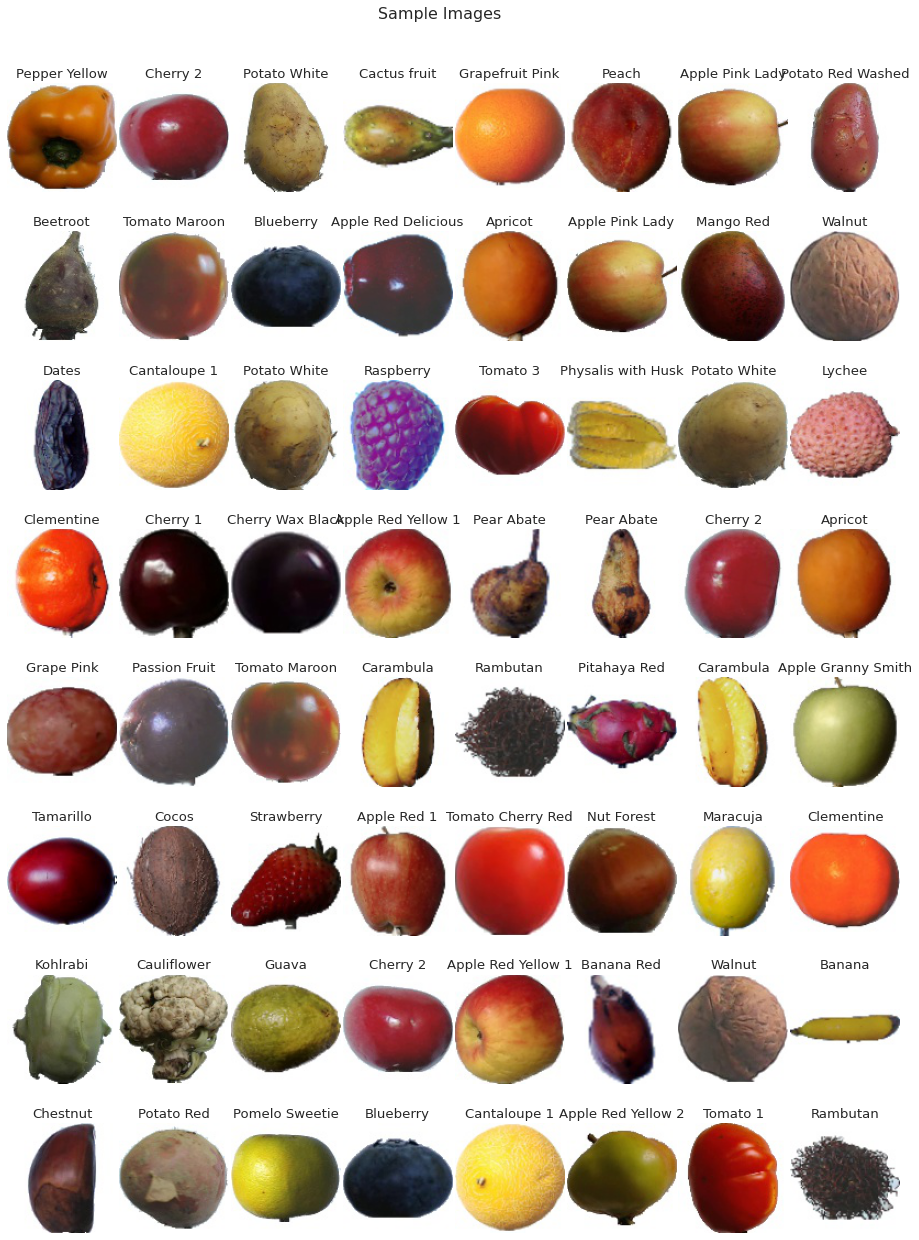

In [30]:
# display sample from test dataset
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)
data_iter = iter(testloader)
images, labels = data_iter.next()  # fetch first batch of 64 images & labels
display_sample(images.cpu().numpy(), labels.cpu().numpy(), grid_shape=(8, 8), 
               fig_size=(16, 20), plot_title='Sample Images')

## Using VGG19 Pre-trained Model

VGG19 is a popular pre-trained model for image classification. It is a layered model and simple to understand. In this section, we will download weights of the VGG19 model and "chop off" the upper Dense layers. In an image classifier, the Conv2D layers are the ones that learn the edges, boundaries and patterns in the image, which is what I want to keep. The Dense layers generate the predictions from the detected patterns - so I'll want to replace these with my own layers (hence the dropping-off of the Dense layers).

In [31]:
from torchvision import models

try:
    del model
except NameError:
    pass # model is not defined yet!

try:
    del vgg16_base
except NameError:
    pass # vgg16_base is not defined yet!

# first call to the line below will download the weights & biases 
# of the VGG16 model
vgg16_base = models.vgg16(pretrained=True)
print(vgg16_base)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [32]:
# to view trainble parameters of this n/w
print(pytk.PytkModuleWrapper(vgg16_base).summary((NUM_CHANNELS, IMAGE_HEIGHT, IMAGE_WIDTH)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 100, 100]           1,792
              ReLU-2         [-1, 64, 100, 100]               0
            Conv2d-3         [-1, 64, 100, 100]          36,928
              ReLU-4         [-1, 64, 100, 100]               0
         MaxPool2d-5           [-1, 64, 50, 50]               0
            Conv2d-6          [-1, 128, 50, 50]          73,856
              ReLU-7          [-1, 128, 50, 50]               0
            Conv2d-8          [-1, 128, 50, 50]         147,584
              ReLU-9          [-1, 128, 50, 50]               0
        MaxPool2d-10          [-1, 128, 25, 25]               0
           Conv2d-11          [-1, 256, 25, 25]         295,168
             ReLU-12          [-1, 256, 25, 25]               0
           Conv2d-13          [-1, 256, 25, 25]         590,080
             ReLU-14          [-1, 256,

In [33]:
# some modifications are needed to vgg16_base

# <<#1>> - we want to freeze all weights of the 'feature' detector of the VGG16 model
# so we can re-use the weights of this secton
for param in vgg16_base.features.parameters():
    param.requires_grad = False

# <<#2>> - freeze 
# for param in vgg16_base.avgpool.parameters():
#     param.requires_grad = False

# #3 - set the out_features of the last Linear layer in the 'classifier' module to NUM_CLASSES
# vgg16_base.classifier[6].out_features = NUM_CLASSES
# print(vgg16_base)

# # #2 - make avgpool 'ineffective' (can't drop it, because internal forward() call refers to it!)

# # HACK - to drop 'averagepool' layer - we just pass on input to output, rendering layer/module 'ineffective'
# class PassThroughLayer(nn.Module):
#     def forward(self, input):
#         return input    
        
# # 'drop' (make ineffective) avgpool layer
# #vgg16_base.avgpool = PassThroughLayer() # will just pass input to output

# # #3 - we want to 'replace' the classifier with our own custom classifier
# class Flatten(nn.Module):
#     def forward(self, input):
#         return input.view(input.size(0), -1)

# our custom classifier
custom_classifier = nn.Sequential(
    nn.Linear(512*7*7, 2048),
    nn.ReLU(),
    nn.Dropout(0.10),      
    nn.Linear(2048, 1024),
    nn.ReLU(),
    nn.Dropout(0.10),        
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.10),         
    nn.Linear(512, NUM_CLASSES)    
)
# replace vgg16_base's classifier with ours
vgg16_base.classifier = custom_classifier

# see what we got
print(vgg16_base)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [34]:
# looks ok. Now train this model using PytModuleWrapper class, which just wraps a nn.Module
model = pytk.PytkModuleWrapper(vgg16_base)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=LR_RATE, momentum=0.8, 
                      nesterov=False, weight_decay=L2_REG)
model.compile(loss=criterion, optimizer=optimizer, metrics=['acc'])
print(model.summary((NUM_CHANNELS, IMAGE_HEIGHT, IMAGE_WIDTH)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 100, 100]           1,792
              ReLU-2         [-1, 64, 100, 100]               0
            Conv2d-3         [-1, 64, 100, 100]          36,928
              ReLU-4         [-1, 64, 100, 100]               0
         MaxPool2d-5           [-1, 64, 50, 50]               0
            Conv2d-6          [-1, 128, 50, 50]          73,856
              ReLU-7          [-1, 128, 50, 50]               0
            Conv2d-8          [-1, 128, 50, 50]         147,584
              ReLU-9          [-1, 128, 50, 50]               0
        MaxPool2d-10          [-1, 128, 25, 25]               0
           Conv2d-11          [-1, 256, 25, 25]         295,168
             ReLU-12          [-1, 256, 25, 25]               0
           Conv2d-13          [-1, 256, 25, 25]         590,080
             ReLU-14          [-1, 256,

### Training the model with `ImageFolder` datasets
`ImageFolder` dataset is the Pytorch equivalent of Keras' `ImageDataGenerator::flow_from_directory()` operation. Just like we can apply several image augmentation technques in Keras, we can apply `transforms` to images, as they are loaded from folders. Just like Keras expects a certain ordering of images in sub-folders (with names that are names of the classes), so also does Pytorch.

In [35]:
hist = model.fit_dataset(train_dataset, validation_dataset=eval_dataset,
                         epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Training on GPU...
Training on 60486 samples, cross-validating on 14432 samples
Epoch ( 1/30): (60486/60486) -> loss: 3.9174 - acc: 0.2544 - val_loss: 2.2880 - val_acc: 0.6227
Epoch ( 2/30): (60486/60486) -> loss: 1.2537 - acc: 0.7402 - val_loss: 0.6957 - val_acc: 0.8474
Epoch ( 3/30): (60486/60486) -> loss: 0.4861 - acc: 0.8904 - val_loss: 0.3969 - val_acc: 0.9074
Epoch ( 4/30): (60486/60486) -> loss: 0.2705 - acc: 0.9391 - val_loss: 0.2893 - val_acc: 0.9311
Epoch ( 5/30): (60486/60486) -> loss: 0.1775 - acc: 0.9619 - val_loss: 0.2365 - val_acc: 0.9390
Epoch ( 6/30): (60486/60486) -> loss: 0.1273 - acc: 0.9742 - val_loss: 0.1959 - val_acc: 0.9497
Epoch ( 7/30): (60486/60486) -> loss: 0.0981 - acc: 0.9813 - val_loss: 0.1683 - val_acc: 0.9581
Epoch ( 8/30): (60486/60486) -> loss: 0.0768 - acc: 0.9859 - val_loss: 0.1566 - val_acc: 0.9589
Epoch ( 9/30): (60486/60486) -> loss: 0.0629 - acc: 0.9889 - val_loss: 0.1529 - val_acc: 0.9584
Epoch (10/30): (60486/60486) -> loss: 0.0521 - acc: 0.99

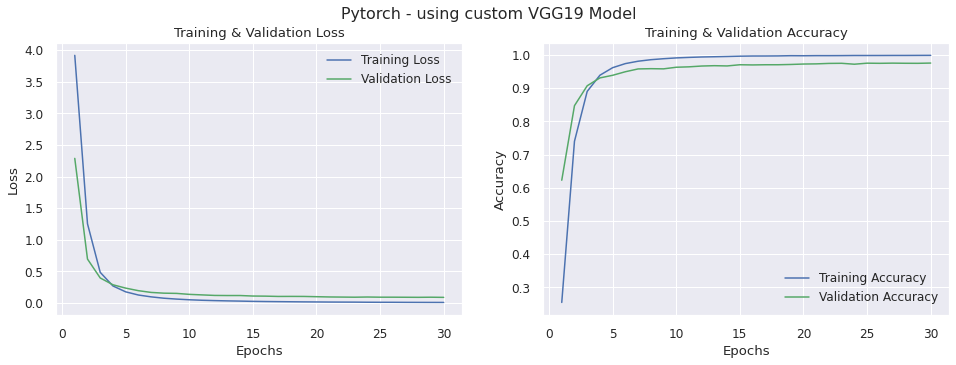

In [39]:
pytk.show_plots(hist, plot_title="Pytorch - using custom VGG19 Model")

In [40]:
# evaluate performance on train, cross-val & test data
loss, acc = model.evaluate_dataset(train_dataset)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model.evaluate_dataset(eval_dataset)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model.evaluate_dataset(test_dataset)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

Evaluating (60486/60486) -> loss: 0.0027 - acc: 1.0000
Training data  -> loss: 0.003, acc: 1.000
Evaluating (14432/14432) -> loss: 0.0901 - acc: 0.9758
Cross-val data -> loss: 0.090, acc: 0.976
Evaluating (6186/6186) -> loss: 0.0797 - acc: 0.9770
Testing data   -> loss: 0.080, acc: 0.977


**Observations:**

>Configuration | Training Acc | Cross-Val Acc | Testing Acc 
>:---|:---:|:---:|:---:|
>**VGG16 Base Model**|99-100%|97-98%|97-98%|

* From the loss & accuracy plots, we see that the model is slightly overfitting our data - there is a 3% difference between train & cross-validation accuracies
* Cross-validation & test accuracies are almost the same - this should be expected as samples were drawn from the same _population_ (viz. the test dataset)

In [41]:
model.save(MODEL_SAVE_PATH)
del model

Pytorch model saved to /content/drive/My Drive/Colab Notebooks/pytorch/model_states/pyt_fruits360_vgg16.pt


## Running Predictions
* Load model from saved state & run predictions...

In [44]:
model = pytk.PytkModuleWrapper(pytk.load_model(MODEL_SAVE_PATH))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=LR_RATE, momentum=0.8, 
                      nesterov=False, weight_decay=L2_REG)
model.compile(loss=criterion, optimizer=optimizer, metrics=['acc'])

print(model.summary((NUM_CHANNELS, IMAGE_HEIGHT, IMAGE_WIDTH)))

Pytorch model loaded from /content/drive/My Drive/Colab Notebooks/pytorch/model_states/pyt_fruits360_vgg16.pt
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 100, 100]           1,792
              ReLU-2         [-1, 64, 100, 100]               0
            Conv2d-3         [-1, 64, 100, 100]          36,928
              ReLU-4         [-1, 64, 100, 100]               0
         MaxPool2d-5           [-1, 64, 50, 50]               0
            Conv2d-6          [-1, 128, 50, 50]          73,856
              ReLU-7          [-1, 128, 50, 50]               0
            Conv2d-8          [-1, 128, 50, 50]         147,584
              ReLU-9          [-1, 128, 50, 50]               0
        MaxPool2d-10          [-1, 128, 25, 25]               0
           Conv2d-11          [-1, 256, 25, 25]         295,168
             ReLU-12          [-1, 256, 25, 25]          

In [45]:
train_dataset = ImageFolder(train_folder_root, simple_transforms)
eval_dataset = ImageFolder(test_folder_root, simple_transforms)
# split eval_dataset into eval & test datasets 70:30
num_eval_recs = int(0.70 * len(eval_dataset))
num_test_recs = len(eval_dataset) - num_eval_recs

eval_dataset, test_dataset = torch.utils.data.random_split(eval_dataset, [num_eval_recs, num_test_recs])
print(len(test_dataset))

6186


In [46]:
# display sample from test dataset
print('Running predictions....')
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
data_iter = iter(testloader)

actuals, predictions = [], []

for batch_no, (images, labels) in enumerate(test_loader):
    # images, labels = data_iter.next()  # fetch first batch of 64 images & labels
    preds = model.predict(images)
    actuals.extend(labels.cpu().numpy().ravel())
    predictions.extend(np.argmax(preds, axis=1).ravel())

actuals = np.array(actuals)
predictions = np.array(predictions)

print('Sample actual values & predictions...')
print('  - Acutal values: ', actuals[:25])
print('  - Predictions  : ', predictions[:25])
correct_preds = (actuals == predictions).sum()
acc = correct_preds / len(actuals)
print('  We got %d of %d correct (%.3f accuracy)' % (correct_preds, len(actuals), acc))

Running predictions....
Sample actual values & predictions...
  - Acutal values:  [ 99  57  66  52  87  96  54  23  50  22  39  76  82 114  15  25  24  71   1  48 109   3   2  55 109]
  - Predictions  :  [ 99  57  66  52  87  96  54  23  50  22  39  76  82 114  15  25  24  71   1  48 109   3   2  55 109]
  We got 6045 of 6186 correct (0.977 accuracy)


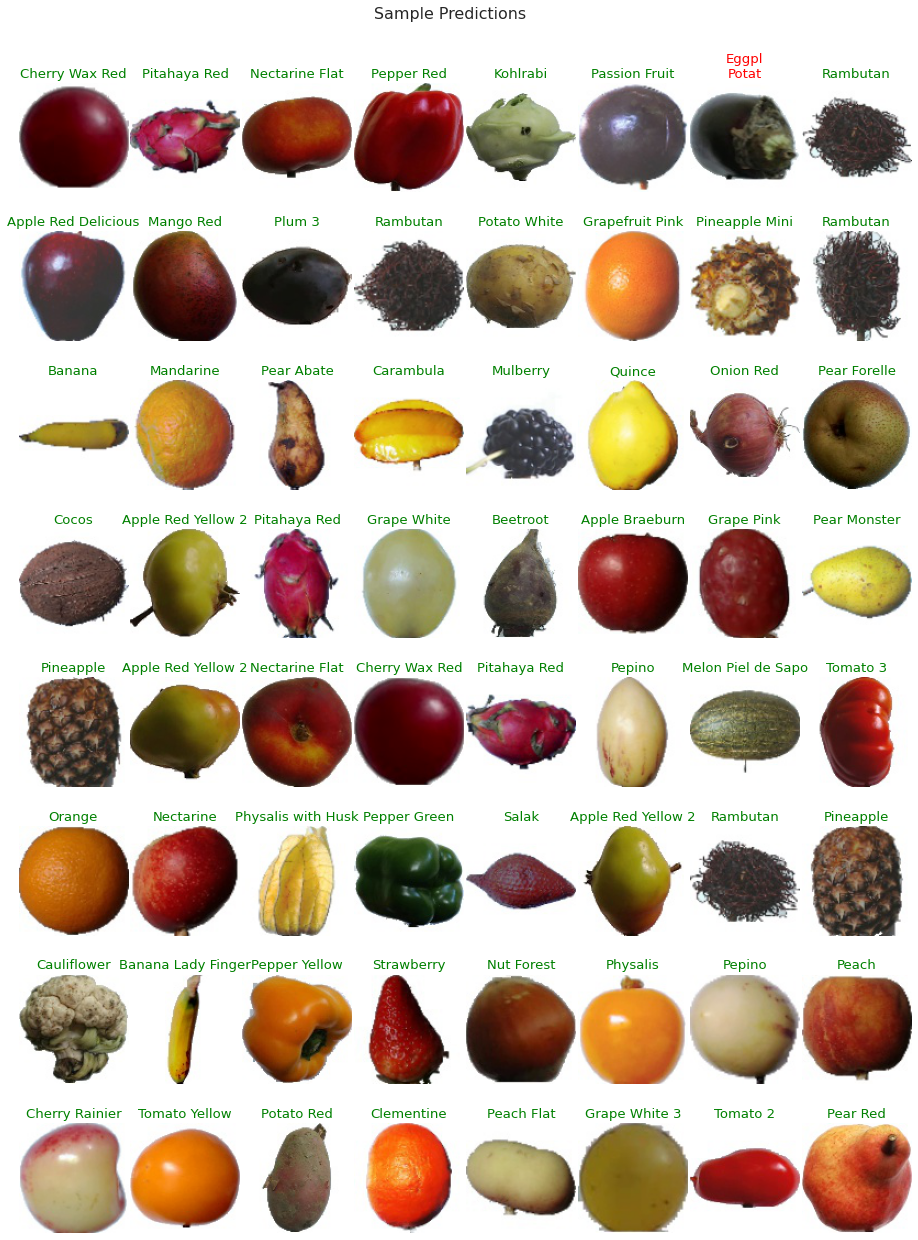

In [47]:
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)
data_iter = iter(testloader)
images, labels = data_iter.next()
preds = model.predict(images)
preds = np.argmax(preds, axis=1)
display_sample(images.cpu().numpy(), labels.cpu().numpy(), sample_predictions=preds, 
               grid_shape=(8, 8), fig_size=(16, 20), plot_title='Sample Predictions')

## Conclusion
* In this workbook we saw how we can use a pre-trained VGG16 classifier to classify images of fruits & vegetables
* We re-used the feature-extractor of the VGG model, but snapped-on our own classifier (Linear model)
* We were able to achieve good performance on test dataset (~97% accuracy).

# <center>---- END ----</center>